## Monkey_936 （dataID:251637) fMOST data_analysis 

In [1]:
import neuro_tracer as nt

import sys,copy,os,inspect

neurovis_path = os.path.abspath(r'D:\projectome_analysis\neuron-vis\neuronVis')
sys.path.append(neurovis_path)

import IONData 
iondata = IONData.IONData()



from pathlib import Path
import matplotlib


import matplotlib.pyplot as plt


import numpy as np
import nibabel as nib  # parse the NII data
import pandas as pd

import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

from scipy.cluster.hierarchy import dendrogram, linkage

neuronlist=iondata.getNeuronListBySampleID('251637')
import nrrd
import region_analysis as ra



### General info for monkey 936 
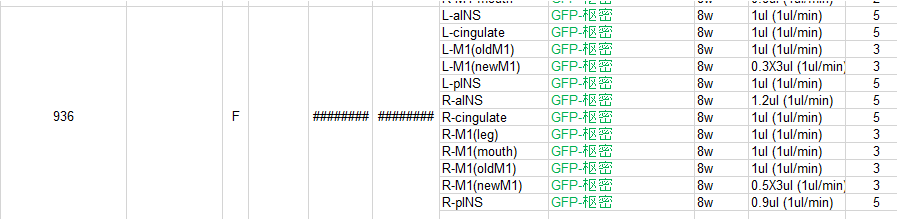



In [2]:

neuronlist=iondata.getNeuronListBySampleID('251637')
neurontable = pd.DataFrame(neuronlist)
neurontable['region'].value_counts(dropna=False)
neurontable['region'] = neurontable['region'].str.replace('\r', '',regex=False)
# Replace empty strings with 'unknown'
neurontable['region'] = neurontable['region'].replace('', 'unknown', regex=False)

# Get the distribution
region_distribution = neurontable['region'].value_counts(dropna=False)
print(f'there are {len(neurontable)} neurons for m936 {region_distribution} \n')

there are 562 neurons for m936 region
M1_79           236
Ia/Id_228       105
Ial_42           63
unknown          45
PrCO_49          35
Ig_229           24
area_3a/b_93     21
Iai_41           20
PMdc_82           5
area_24c_10       5
preSMA_88         2
F4_85             1
Name: count, dtype: int64 



## the analysis of monkey 936 data is based on NMT template and atlas, I created a combined atlas with a combination of CHARM and SARM with all hierarchical levels
detailed code can be found in [My Document](D:/projectome_analysis/main_scripts/subsidary_functions/atlas_creation.py)

In [3]:

atlas_path = r'D:\projectome_analysis\atlas\nmt_structure_with_hiearchy.nii.gz'
table_path = r'D:\projectome_analysis\atlas\nmt_structures_labels.txt'
template_path = r'D:\projectome_analysis\atlas\NMT_v2.0_sym\NMT_v2.0_sym\NMT_v2.0_sym_SS.nii'


atlas = nib.load(atlas_path)
reso = np.diag(atlas.affine) [0:3]

print(f'Atlas dimension {atlas.shape}, Voxel reso: {reso} mm \n \n ')

combined_atlas_nii = nib.load(atlas_path)
atlas_data = combined_atlas_nii.get_fdata()
global_id_df = pd.read_csv(table_path, delimiter='\t')
template_nii = nib.load(template_path)


Atlas dimension (256, 312, 200, 1, 6), Voxel reso: [0.25 0.25 0.25] mm 
 
 


## Performing a preliminary analysis on monkey 936 neurons (562 neurons)

In [4]:


pop = ra.PopulationRegionAnalysis('251637', atlas_data, global_id_df,template_img=template_nii,nii_space='monkey')
pop.process(limit = None, level=6)  


Processing 562 neurons at Level 6...
  -> 001.swc
Loading SWC from local file: d:\projectome_analysis\main_scripts\processed_neurons\251637\001.swc
there are 204 terminal nodes

Constructing branches, assigning orders 
 


Finished with 401 branches
  -> 002.swc
Loading SWC from local file: d:\projectome_analysis\main_scripts\processed_neurons\251637\002.swc
there are 24 terminal nodes

Constructing branches, assigning orders 
 


Finished with 42 branches
  -> 003.swc
Loading SWC from local file: d:\projectome_analysis\main_scripts\processed_neurons\251637\003.swc
there are 46 terminal nodes

Constructing branches, assigning orders 
 


Finished with 83 branches
  -> 004.swc
Loading SWC from local file: d:\projectome_analysis\main_scripts\processed_neurons\251637\004.swc
there are 222 terminal nodes

Constructing branches, assigning orders 
 


Finished with 438 branches
  -> 005.swc
Loading SWC from local file: d:\projectome_analysis\main_scripts\processed_neurons\251637\005.swc
ther

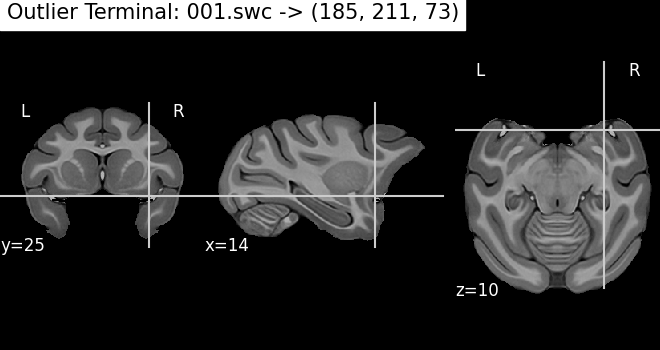 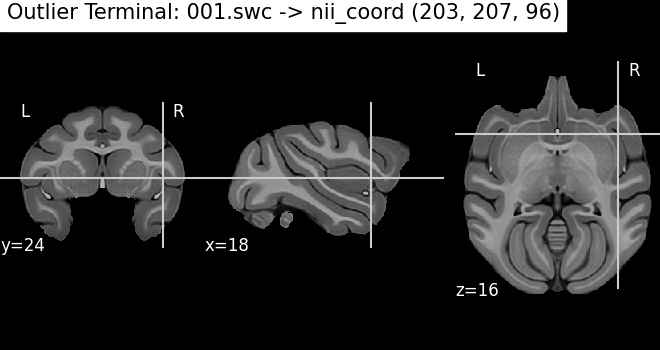 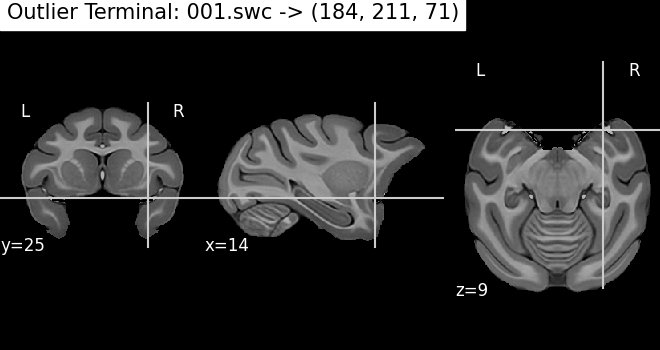

### we could have an overview of the total of 562 neurons 
### the type classification is based on projection region, utilising the regular spacing of the atlas indices.
-  the rule is
   - PT: Targets IDs 461-618 (Brainstem).
   - CT: Targets IDs 405-452 (Thalamus).
   - IT: Targets IDs 1-373 (Telencephalon). 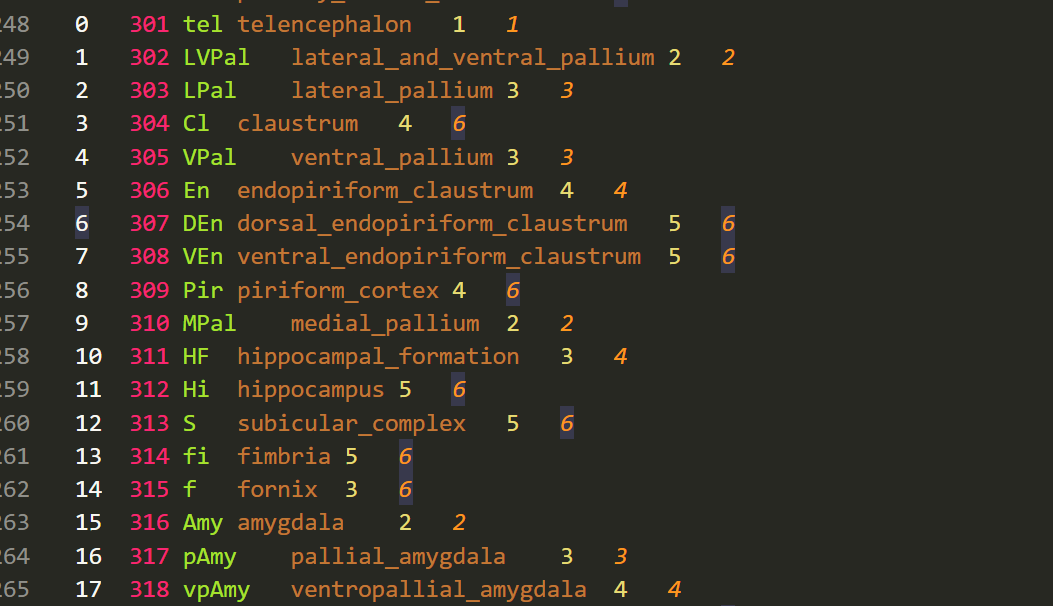 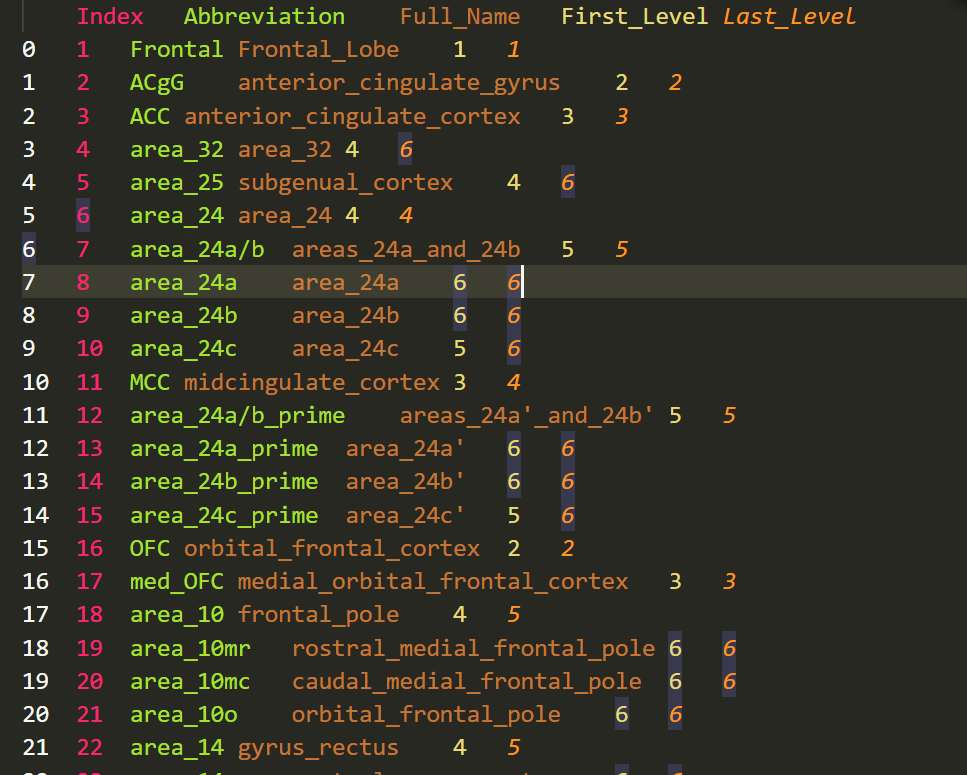

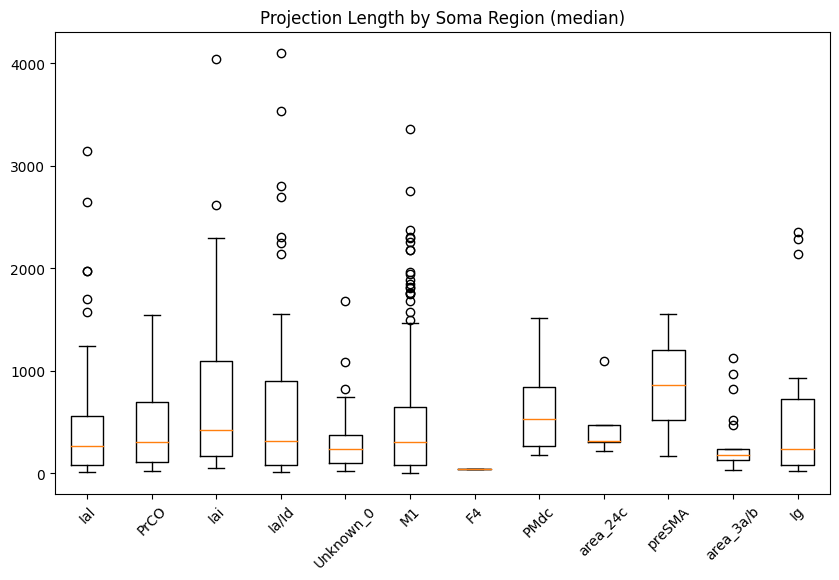

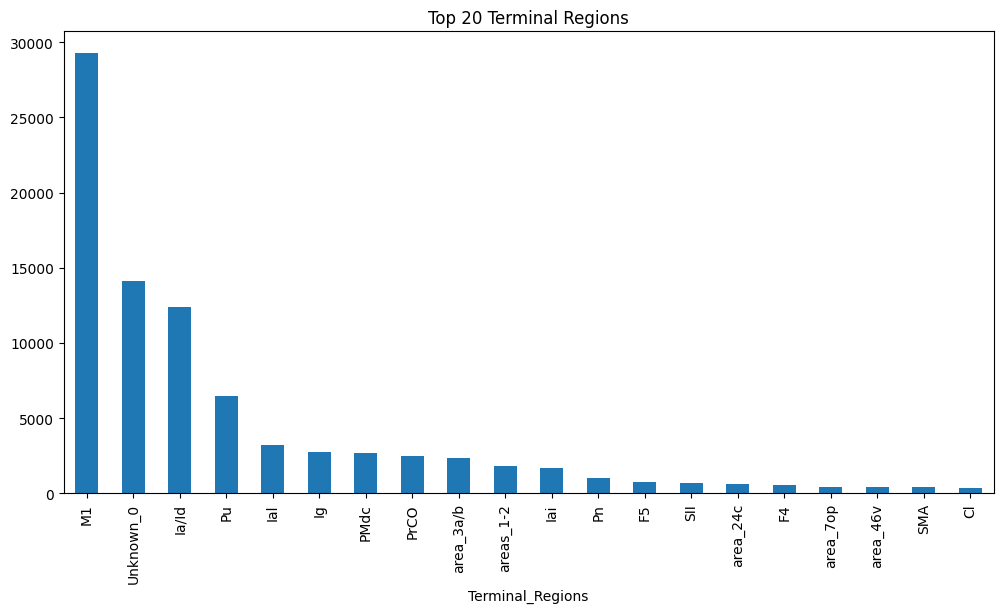

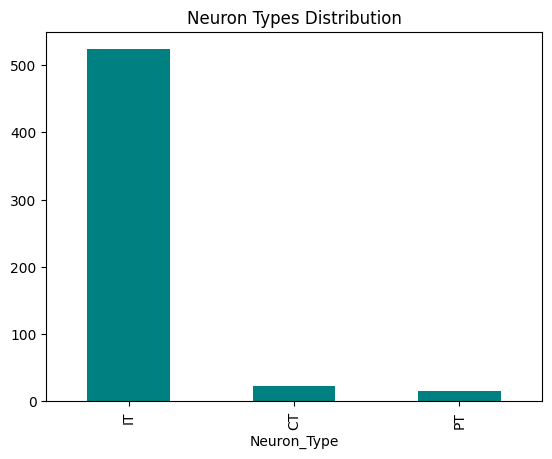

,NeuronID,Neuron_Type,Ial,Cl,Pu,IPAC,ac,Acb,VP,PrCO,...,APir,area_14c,area_25,OT/Pir,TGvg,area_10mc,area_14r,RTM,MM,V4d
0,001.swc,IT,329.489,14.371,226.388,8.567,90.096,2.917,0.610,21.657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,002.swc,IT,23.567,0.000,0.000,0.000,0.000,0.000,0.000,2.182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,003.swc,IT,18.999,0.000,0.000,0.000,0.000,0.000,0.000,46.194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,004.swc,IT,18.040,55.415,937.607,1.746,152.903,18.748,0.000,58.495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,005.swc,PT,8.899,8.036,8.348,0.000,28.746,2.066,14.471,47.029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,558.swc,IT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,559.swc,IT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,560.swc,IT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560,561.swc,IT,0.000,20.984,9.373,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
%matplotlib inline    

pop.plot_projection_by_soma(stat='median')  # or 'mean'
pop.plot_terminal_distribution()
pop.plot_type_distribution()
pop.get_region_matrix()



In [66]:
# region_matrix=pop.get_region_matrix()
# region_matrix.to_csv('936_region_matrix.csv')
pop.plot_dataframe.to_excel('936_region.xlsx')

### Extract brain area names related to insula to filter out insular neurons`

In [9]:

insula_abbr_table =global_id_df['Abbreviation'][global_id_df['Full_Name'].str.contains('insula',case=False)]

print('there are %d insula regions in the monkey 936 atlas'%len(insula_abbr_table),'\n',insula_abbr_table)

there are 11 insula regions in the monkey 936 atlas 
 38     Iam/Iapm
39       lat_Ia
40          Iai
41          Ial
42         Iapl
224      Ins/Pi
225          Pi
226         Ins
227       Ia/Id
228          Ig
229          Ri
Name: Abbreviation, dtype: object


### there are 212 insular neurons in monkey 936 (with soma_region name filtering - )
#### Soma distribution of Insula neurons for m936


--- Filtering for neurons with soma in regions: ['Iam/Iapm', 'lat_Ia', 'Iai', 'Ial', 'Iapl', 'Ins/Pi', 'Pi', 'Ins', 'Ia/Id', 'Ig', 'Ri'] ---

Neurons matching the target soma regions:
there are 212 insula neurons  


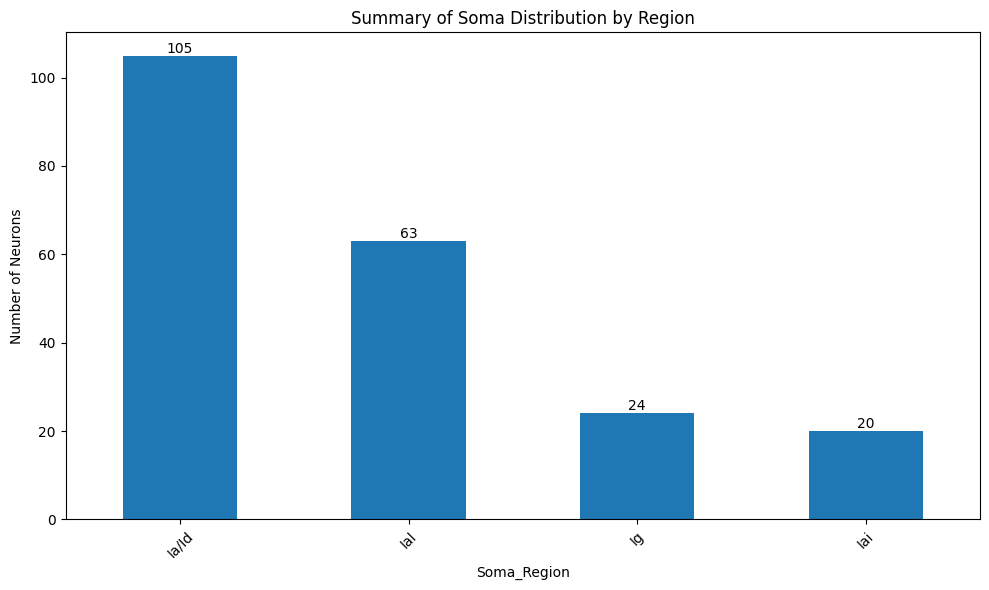

In [ ]:

neuron_analysis_df = pop.plot_dataframe


target_soma_regions = insula_abbr_table.tolist()

print(f"\n--- Filtering for neurons with soma in regions: {target_soma_regions} ---")

filtered_neurons_df = neuron_analysis_df[neuron_analysis_df['Soma_Region'].isin(target_soma_regions)]

if not filtered_neurons_df.empty:
    print("\nNeurons matching the target soma regions:")
    # Display relevant columns for the filtered neurons
    # print(filtered_neurons_df[['NeuronID', 'Soma_Region', 'Projection_length']])
else:
    print("No neurons found with soma regions in the specified list.")
def plot_soma_distribution(df):
        soma_counts = df['Soma_Region'].value_counts()
        fig, ax = plt.subplots(figsize=(10, 6))
        soma_counts.plot(kind='bar', ax=ax)
        ax.set_title('Summary of Soma Distribution by Region')
        ax.set_ylabel('Number of Neurons')
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        for i, height in enumerate(soma_counts):
            ax.text(i, height, str(height), ha='center', va='bottom')
        plt.show()
print(f'there are {len(filtered_neurons_df)} insula neurons  ')
plot_soma_distribution(filtered_neurons_df)


### Next, I focus my analysis over these neurons.
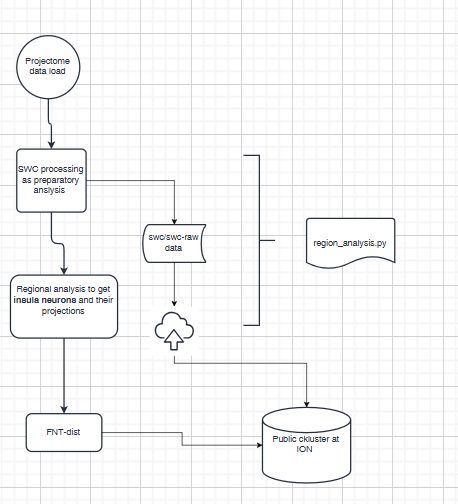
### I will first try to implement FNT-dist. This would take several steps:
 1. FNT-decimate to lower the computational load.
 2. rename the decimatedFNT-files by editing the last row.
 3. join the fnt files into a single file.


In [ ]:
import os
import shutil
import fnt_tools  # Assuming your functions are saved in this module

# 1. Setup Paths
sample_id = '251637'
neuron_dir = os.path.join(os.getcwd(), 'processed_neurons', sample_id)

# Define and Create the destination subfolder
output_subdir = os.path.join(neuron_dir, 'fnt_processed')
os.makedirs(output_subdir, exist_ok=True)

print(f"Input Directory: {neuron_dir}")
print(f"Output Directory: {output_subdir}")

# 2. Run Loop
neurons = filtered_neurons_df['NeuronID'].to_list()

for neuron_id in neurons:
    
    # Define File Paths
    input_swc = os.path.join(neuron_dir, neuron_id)
    
    # Intermediate files (Created in the same folder as SWC)
    input_fnt = input_swc + '.fnt'
    generated_dec = input_swc + '.fnt.decimate.fnt'
    
    # Final Destination Path
    final_dec_path = os.path.join(output_subdir, neuron_id + '.decimate.fnt')
    
    print(f"Processing {neuron_id}...")

    try:
        # Step A: Convert SWC -> FNT
        # Creates: /processed_neurons/251637/001.swc.fnt
        fnt_tools.swc2fnt(input_swc)
        
        # Step B: Decimate
        # Creates: /processed_neurons/251637/001.swc.decimate.fnt
        fnt_tools.fnt_decimate(input_fnt)
        
        # Step C: Move to Subfolder
        if os.path.exists(generated_dec):
            shutil.move(generated_dec, final_dec_path)
            print(f"  -> Moved result to: {output_subdir}")
        else:
            print(f"  [Error] Decimation failed, file not found: {generated_dec}")

    except Exception as e:
        print(f"  [Exception] {neuron_id}: {e}")

print("\nBatch processing complete.")

fnt-from-swc.exe d:\projectome_analysis\main_scripts\processed_neurons/251637/001.swc d:\projectome_analysis\main_scripts\processed_neurons/251637/001.swc.fnt
Error:
'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.



Combinning FNT and neuron plot we could check the neuron identity

In [ ]:

import fnt_tools

fnt_tools.region_swc2fnt(filtered_neurons_df,"Iapl")


NameError: name 'filtered_neurons_df' is not defined

### Regarding QC, I am developing useful features to help.
1. there are outliers (terminal nodes/soma in the unknown regions), I have included counts for outliers and snapshots can be saved for revision. i.e.   
 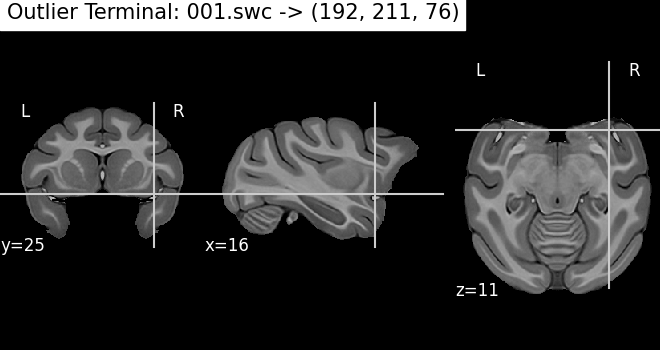
2. we can quickly call up fnt-tracer or matlabplot to visualise neuron trace, we could also plot neuronal volume.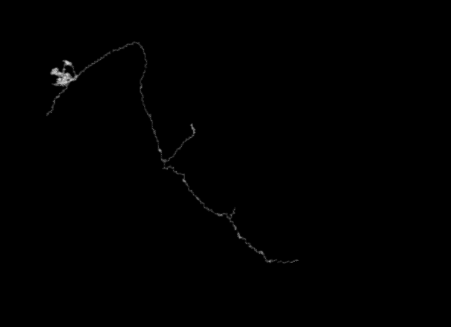 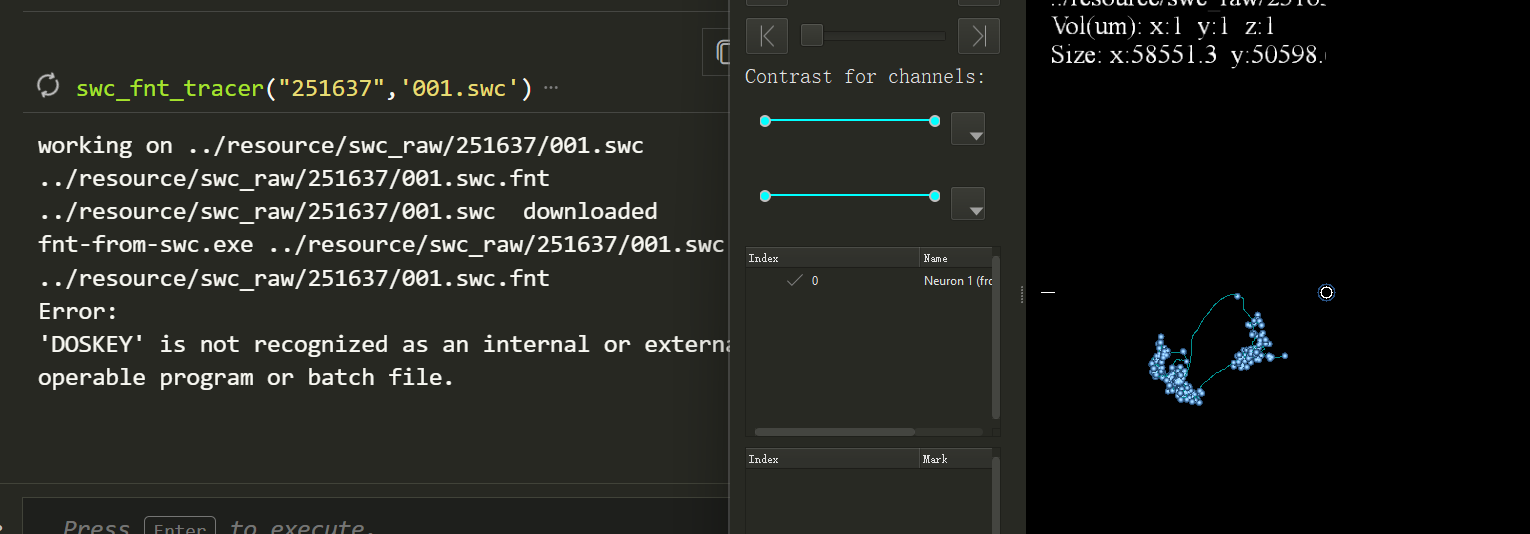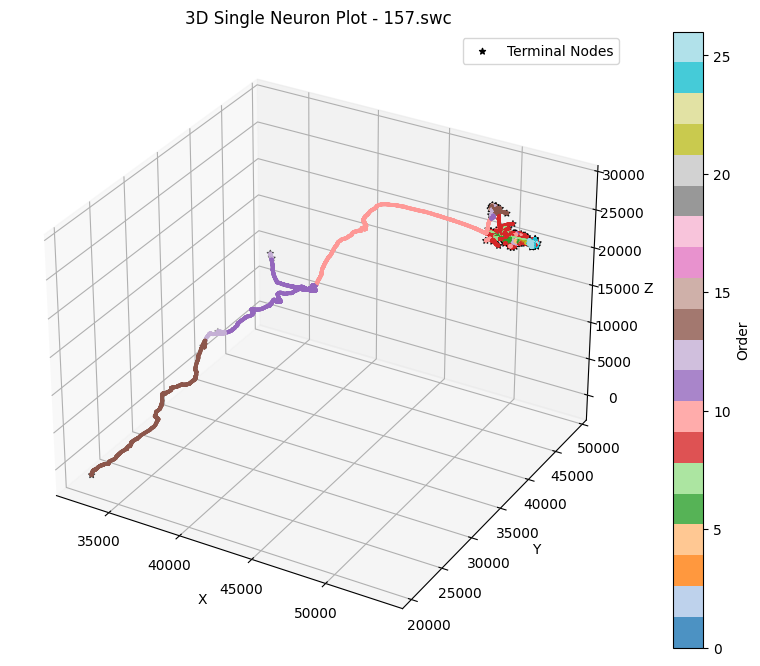
3. more visualisation tools like flatmap, axon morphology inspect and soma segment inspection could be added.

c:\Users\binbi\anaconda3\envs\neuronVis\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


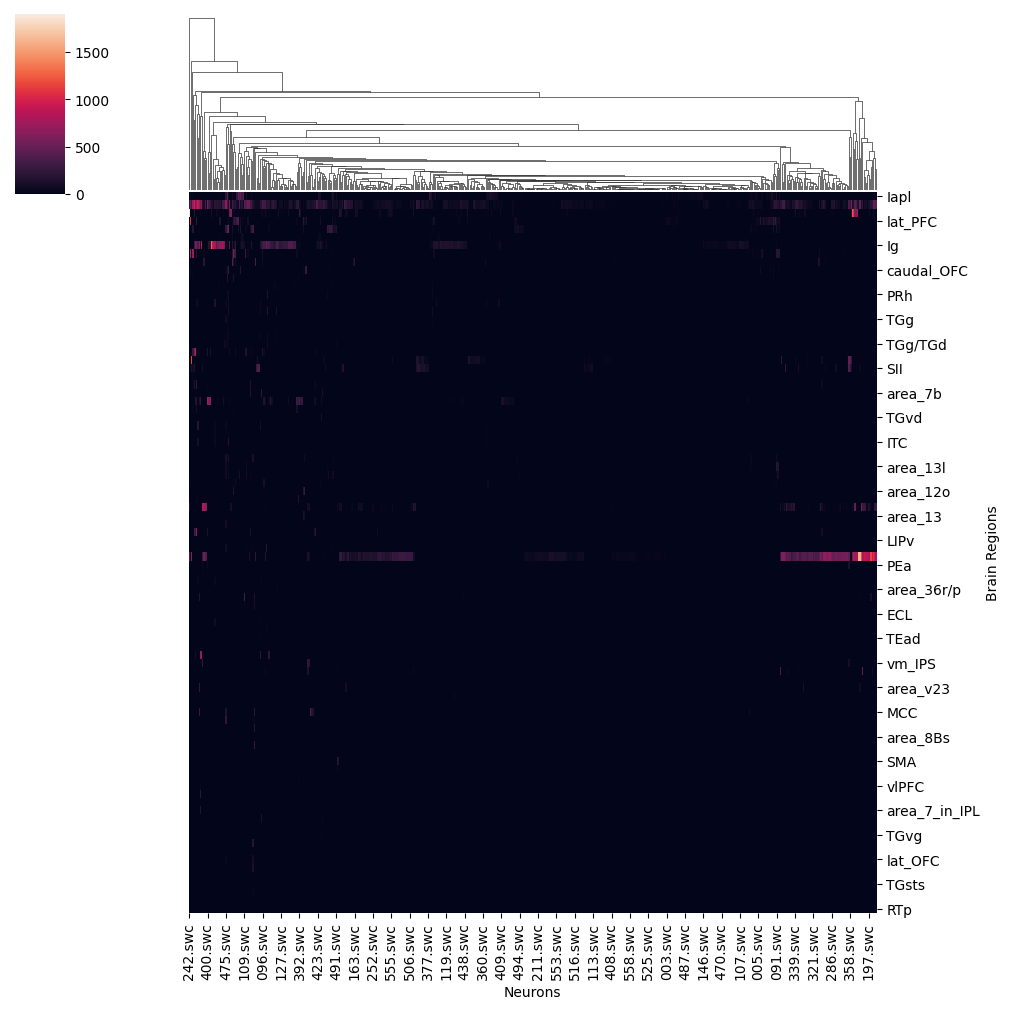

In [ ]:
%matplotlib inline
figure2 = pd.DataFrame(pop.region_projection_lengths,index=pop.neuron_ids)
figure2.fillna(0,inplace=True)


row_linkage = linkage(figure2.T, method='ward', metric='euclidean')  # Cluster neurons

g = sns.clustermap(figure2.T,
                   row_linkage=row_linkage,
                   row_cluster=False)

g.ax_heatmap.set_ylabel('Brain Regions')
g.ax_heatmap.set_xlabel('Neurons')


# Show the plot
plt.show()